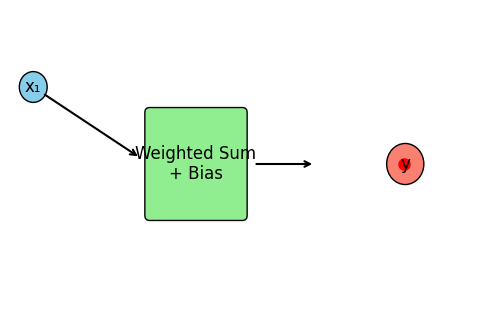

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# Draw static diagram

# Input node at (0.5, 4.5)
input_pos = (0.5, 4.5)
input_circle = plt.Circle(input_pos, 0.3, color='skyblue', ec='black', zorder=2)
ax.add_patch(input_circle)
ax.text(input_pos[0], input_pos[1], "x₁", fontsize=12, ha='center', va='center')

# Weighted Sum box (located at (3,2) with width=2, height=2; center ~ (4,3))
ws_box = patches.FancyBboxPatch((3, 2), 2, 2, boxstyle="round,pad=0.1",
                                edgecolor='black', facecolor='lightgreen', zorder=1)
ax.add_patch(ws_box)
ax.text(4, 3, "Weighted Sum\n+ Bias", fontsize=12, ha='center', va='center')

# Output node at (8.5, 3)
output_pos = (8.5, 3)
output_circle = plt.Circle(output_pos, 0.4, color='salmon', ec='black', zorder=2)
ax.add_patch(output_circle)
ax.text(output_pos[0], output_pos[1], "y", fontsize=12, ha='center', va='center')

# Draw static arrows with shrink parameters so arrows do not intrude into the circles
ax.annotate("", xy=(3, 3), xytext=input_pos,
            arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=10, shrinkB=10))
ax.annotate("", xy=(6.8, 3), xytext=(5, 3),
            arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=10, shrinkB=10))

# Define the animated path:
# - Segment 1: from input node to left edge of the weighted sum box (approx. (3,3))
# - Segment 2: from the right edge of the weighted sum box (approx. (5,3)) to the output node
start1 = np.array(input_pos)
end1   = np.array([3, 3])
start2 = np.array([5, 3])
end2   = np.array(output_pos)

# Create a red dot to represent the "information"
info_dot, = ax.plot([], [], 'ro', markersize=8)

frames = 200  # total number of frames

def init():
    info_dot.set_data([], [])
    return info_dot,

def update(frame):
    if frame < 100:
        t = frame / 100
        pos = start1 * (1 - t) + end1 * t
    else:
        t = (frame - 100) / 100
        pos = start2 * (1 - t) + end2 * t
    # Wrap pos[0] and pos[1] in lists so that they are sequences
    info_dot.set_data([pos[0]], [pos[1]])
    return info_dot,

anim = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=50)

# Display the animation inline in Google Colab
HTML(anim.to_jshtml())
